# Classification of Hand Written Digits with CNN


In [8]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [20]:
from matplotlib import pyplot as plt

In [9]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28


In [10]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# convert to normal
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [26]:
img = x_train[0]
img[14:19, 14:19]

array([[0.9411765 , 0.99215686, 0.99215686, 0.46666667, 0.09803922],
       [0.1764706 , 0.7294118 , 0.99215686, 0.99215686, 0.5882353 ],
       [0.        , 0.0627451 , 0.3647059 , 0.9882353 , 0.99215686],
       [0.        , 0.        , 0.        , 0.9764706 , 0.99215686],
       [0.18039216, 0.50980395, 0.7176471 , 0.99215686, 0.99215686]],
      dtype=float32)

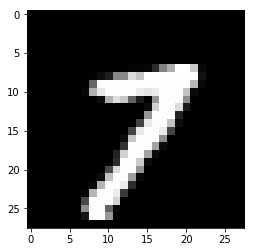

In [28]:
img = x_train[40000]
plt.imshow(img, cmap='gray')

In [4]:

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
    
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


W1014 17:40:14.924559  1096 deprecation_wrapper.py:119] From c:\program files\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1014 17:40:14.948530  1096 deprecation_wrapper.py:119] From c:\program files\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1014 17:40:14.952512  1096 deprecation_wrapper.py:119] From c:\program files\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1014 17:40:14.980505  1096 deprecation_wrapper.py:119] From c:\program files\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1014 17:40:14.984504  1096 deprecation_wrapper.py:119] From c:\program fil

In [7]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


W1014 17:40:15.216444  1096 deprecation.py:323] From c:\program files\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 205s 3ms/step - loss: 0.2649 - acc: 0.9184 - val_loss: 0.0635 - val_acc: 0.9799
Epoch 2/12
60000/60000 [==============================] - 217s 4ms/step - loss: 0.0908 - acc: 0.9731 - val_loss: 0.0409 - val_acc: 0.9868
Epoch 3/12
60000/60000 [==============================] - 210s 4ms/step - loss: 0.0669 - acc: 0.9793 - val_loss: 0.0366 - val_acc: 0.9870
Epoch 4/12
60000/60000 [==============================] - 203s 3ms/step - loss: 0.0549 - acc: 0.9832 - val_loss: 0.0333 - val_acc: 0.9891
Epoch 5/12
60000/60000 [==============================] - 184s 3ms/step - loss: 0.0485 - acc: 0.9856 - val_loss: 0.0332 - val_acc: 0.9882
Epoch 6/12
60000/60000 [==============================] - 197s 3ms/step - loss: 0.0432 - acc: 0.9873 - val_loss: 0.0304 - val_acc: 0.9899
Epoch 7/12
60000/60000 [==============================] - 209s 3ms/step - loss: 0.0387 - acc: 0.9882 - val_loss: 0.0269 - 

E1014 18:19:11.241619  1096 ultratb.py:149] Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])